<a href="https://colab.research.google.com/github/gaurvviii/RL/blob/main/Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated Reward Probabilities: [0.         0.30451128 0.37067773]


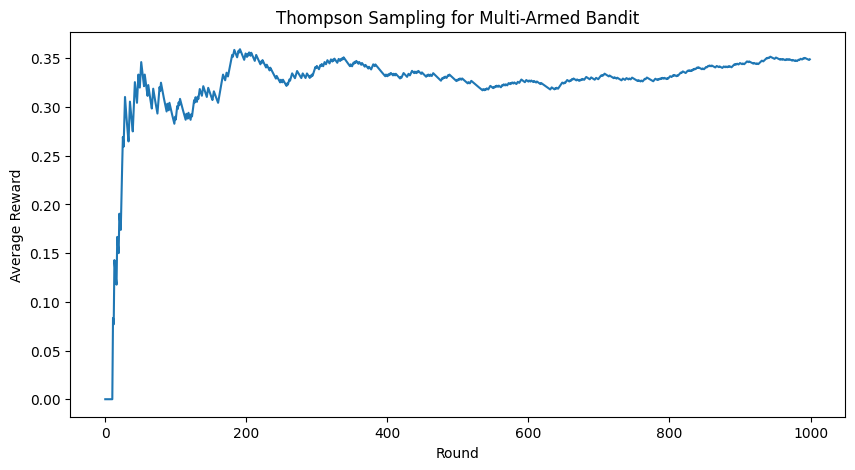

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Multi-Armed Bandit Problem
num_arms = 3  # Number of arms (slot machines)
true_rewards = np.random.uniform(0, 1, num_arms)  # True reward probabilities for each arm

# Initialize variables for Thompson Sampling
num_rounds = 1000
num_samples = np.zeros(num_arms)
num_successes = np.zeros(num_arms)
total_reward = 0
reward_history = []

# Thompson Sampling Algorithm
for t in range(1, num_rounds + 1):
    # Sample from the posterior distribution for each arm
    sampled_theta = np.random.beta(num_successes + 1, num_samples - num_successes + 1)

    # Choose the arm with the highest sampled reward probability
    selected_arm = np.argmax(sampled_theta)

    # Simulate pulling the selected arm and observe the reward
    reward = np.random.binomial(1, true_rewards[selected_arm])

    # Update the statistics for the selected arm
    num_samples[selected_arm] += 1
    num_successes[selected_arm] += reward

    # Update the total reward
    total_reward += reward
    reward_history.append(total_reward / t)

# Print the estimated reward probabilities for each arm
print("Estimated Reward Probabilities:", num_successes / num_samples)

# Plot the cumulative reward over time
plt.figure(figsize=(10, 5))
plt.plot(reward_history)
plt.xlabel("Round")
plt.ylabel("Average Reward")
plt.title("Thompson Sampling for Multi-Armed Bandit")
plt.show()
